Name: Farhan Shoukat<br>
Roll No: Fa20/BSAI/048<br>
Lab: 9<br>
Group Memeber : Solo<br>

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

#Data Cleaning

In [19]:
url = '/content/drive/MyDrive/ColabData/nba_logreg.csv'
dataset = pd.read_csv(url)
dataset.drop(columns='Name', inplace=True )
dataset.insert(loc = 0, column = 'X0', value = 1) #for theta0 during matrix multiplication
dataset.dropna(inplace=True)
dataset

,X0,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,1,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,1,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,1,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,1,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,1,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,1,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,1,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [20]:
def MeanNormalization(a):
  return ((a-np.mean(a))/np.std(a))

In [21]:
#Nomalization of Features Using Mean Normalization
features = dataset.columns[1:-1]
for i in features:
  dataset[i] = MeanNormalization(dataset[i])

df = dataset.to_numpy()
df.dtype

dtype('float64')

In [22]:
#Seperating Features and Output Columns
x = df[:,:-1]
y = df[:,-1]
No_ofFeatures = 20
print(f"Shape of X : {x.shape}")
print(f"Shape of Y : {y.shape}")

Shape of X : (1329, 20)
Shape of Y : (1329,)


In [23]:
#Creating Train Test Split
train_X,test_X, train_Y, test_Y = train_test_split(x, y, test_size=0.2, random_state= 25)
print(f"Shape of TrainX : {train_X.shape}")
print(f"Shape of TrainY : {train_Y.shape}")
print(f"Shape of TestX : {test_X.shape}")
print(f"Shape of TestY : {test_Y.shape}")

Shape of TrainX : (1063, 20)
Shape of TrainY : (1063,)
Shape of TestX : (266, 20)
Shape of TestY : (266,)


#Logistic Regression Class Implentation

In [24]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random


class Logistic_Regressor:
  def __init__(self, noOfFeature, lr=0.1):
    self.weights = self.InitializeWeights(noOfFeature)
    self.learning_rate = lr
    self.noOfFeature = noOfFeature
    self.ErrorTrain = list()
    self.ErrorValidation = list()


  #////////////////////////////////////////////////////////////////////////////
  #/////THESE ARE FEW GENERIC FUCTIONS THAT ALL THREE(BATCH, STOCHASTIC, MINI-BATCH) GRADIENT DESCENT WILL NEDD
  #///////////////////////////////////////////////////////////////////////////

  def InitializeWeights(self, noofFeatures):
    temp = list()
    for i in range(noofFeatures):
      temp.append(random.uniform(0.001, 0.1))
    return np.array(temp)

  def Pridction(self, x, getLabel = False):
      if getLabel == True:
        sig = 1/(1 + np.exp(- np.matmul(x, self.weights)))
        sig = np.minimum(sig, 0.9999)
        sig = np.maximum(sig, 0.0001)
        return self.Generic_GetLabels(sig)
      else:
        sig = 1/(1 + np.exp(- np.matmul(x, self.weights)))
        sig = np.minimum(sig, 0.9999)
        return np.maximum(sig, 0.0001)
        
  def Generic_BinaryCrossEntropy(self, pridicted, actual):
      return np.sum(-((actual * np.log2(pridicted)) + ((1 - actual) * np.log2(1-pridicted))))/len(actual)
  
  def Generic_DerivateWeights(self, pridcted, actual, tempx):
      x = np.transpose(tempx)
      return (np.matmul(x, (pridcted-actual))/len(tempx))

  def Generic_UpdateWeights(self, derivate):
      new_weights = list()
      for i in range(len(derivate)):
        new_weights.append((self.weights[i]-derivate[i]*self.learning_rate))
      self.weights = np.array(new_weights)

  def Generic_AccuracyScore(self, actual, pridicted):
    return np.round(accuracy_score(actual, pridicted), 4)

  def Generic_GetLabels(self, pridicted):
    return np.where(pridicted>0.5, 1, 0)

  def earlyStopping(self, v_acc, b_acc, b_weights, count , pait, c):

    if c > 0:
      if v_acc > b_acc:
        b_weights = self.weights
        b_acc = v_acc
        count = 0
      else:
        count+=1

      if self.ErrorValidation[c-1] < self.ErrorValidation[c] or count > 15:
        pait+=1
        if pait > 3:
          self.weights = b_weights
          print('****************BEST WEIGHTS ON WHICH HIGHEST ACCURACY ACHIEVED - RESTORIED******************')
          return True, b_acc, b_weights, count, pait
        else:
          return False, b_acc, b_weights, count, pait
      else:
        pait = 0
        return False, b_acc, b_weights, count, pait
    else:
      return False, v_acc, self.weights, count, pait



  
  #////////////////////////////////////////////////////////////////////////////
  #/////THESE ARE IMPLEMENTAION OF THE THREE(BATCH, STOCHASTIC, MINI-BATCH) GRADIENT DESCENT
  #///////////////////////////////////////////////////////////////////////////

  #*******BATCH GRADIENT DESCENT********

  def Batch_GD(self, trainX, trainY, testX, testY):
    Patience = 0
    No_ofIteration = 0
    best_accuracy = 0
    best_weights = [0,0,0]
    bestUnchangedCount = 0

    for c in range(100000000):
      print(f"Epoch {c+1}:\n")
      
      hTrain = self.Pridction(trainX)
      JTrain = self.Generic_BinaryCrossEntropy(hTrain, trainY)
      derivate_weights = self.Generic_DerivateWeights(hTrain, trainY, trainX)
      self.Generic_UpdateWeights(derivate_weights)

      self.ErrorTrain.append(JTrain)
      validation = self.Pridction(test_X)
      validationError = np.round(self.Generic_BinaryCrossEntropy(validation, testY),8)
      validation = self.Generic_GetLabels(validation)
      validation_acc = self.Generic_AccuracyScore(test_Y, validation)
      self.ErrorValidation.append(validationError)

      print("Traning Error : ", end = " ")
      print(f"{np.round(self.ErrorTrain[c],8)}   ||   Validation Error : {validationError}    Validation Accuracy : {validation_acc}  ")
      print()
      print("===========================================================================================================================================")
      loopBreaker, best_accuracy, best_weights, bestUnchangedCount, Patience = self.earlyStopping(validation_acc, best_accuracy, best_weights, bestUnchangedCount, Patience, c)
      if(loopBreaker == True):
        break
  

  #*******STOCHASTIC GRADIENT DESCENT********

  def Stochastic_GD(self, trainX, trainY, testX, testY):

    def Stochastic_BinaryCrossEntropy(pridicted, actual):
      return -((actual * np.log2(pridicted)) + ((1 - actual) * np.log2(1-pridicted)))

    def Stochastic_DerivateWeights(pridicted, actual, tempx):
      return tempx * (pridicted-actual)

    Patience = 0
    No_ofIteration = 0
    best_accuracy = 0
    best_weights = list()
    bestUnchangedCount = 0

    for c in range(100000000):
      print(f"Epoch {c+1}:\n")

      tempTrainError = list()
      for r in range(len(trainX)):
        hTrain = self.Pridction(trainX[r,:])
        JTrain = Stochastic_BinaryCrossEntropy(hTrain, trainY[r])
        tempTrainError.append(JTrain)
        derivate_weights = Stochastic_DerivateWeights(hTrain, trainY[r], trainX[r,:])
        self.Generic_UpdateWeights(derivate_weights)
    
      self.ErrorTrain.append(np.mean(tempTrainError))
      validation = self.Pridction(test_X)
      validationError = np.round(self.Generic_BinaryCrossEntropy(validation, testY),8)
      validation = self.Generic_GetLabels(validation)
      validation_acc = self.Generic_AccuracyScore(test_Y, validation)
      self.ErrorValidation.append(validationError)

      print(end=f"{r}/{len(trainX)-1} :   Traning Error : ")
      print(f"{np.round(self.ErrorTrain[c],8)}   ||   Validation Error : {validationError}    Validation Accuracy : {validation_acc}  ")
      print()
      print("===========================================================================================================================================")
      
      
      loopBreaker, best_accuracy, best_weights, bestUnchangedCount, Patience = self.earlyStopping(validation_acc, best_accuracy, best_weights, bestUnchangedCount, Patience, c)
      if(loopBreaker == True):
        break

  #*******MINI-BATCH GRADIENT DESCENT********

  def MiniBatch_GD(self, trainX, trainY, testX, testY, batch_size):
    
    Patience = 0
    No_ofIteration = 0
    best_accuracy = 0
    best_weights = list()
    bestUnchangedCount = 0
    No_ofDataPerEpoch = len(trainX)//batch_size

    for c in range(100000000):
      print(f"Epoch {c+1}:\n")

      batch_start = 0
      batch_end = 0
      tempTrainError = list()

      for r in range(No_ofDataPerEpoch):
        batch_start = batch_end
        batch_end = batch_start + batch_size
        hTrain = self.Pridction(trainX[batch_start:batch_end,:])
        JTrain = self.Generic_BinaryCrossEntropy(hTrain, trainY[batch_start:batch_end])
        tempTrainError.append(JTrain)
        derivate_weights = self.Generic_DerivateWeights(hTrain, trainY[batch_start:batch_end], trainX[batch_start:batch_end,:])
        self.Generic_UpdateWeights(derivate_weights)

      self.ErrorTrain.append(np.mean(tempTrainError))
      validation = self.Pridction(test_X)
      validationError = np.round(self.Generic_BinaryCrossEntropy(validation, testY),8)
      validation = self.Generic_GetLabels(validation)
      validation_acc = self.Generic_AccuracyScore(test_Y, validation)
      self.ErrorValidation.append(validationError)

      print(end="Traning Error : ")
      print(f"{np.round(self.ErrorTrain[c],8)}   ||   Validation Error : {validationError}    Validation Accuracy : {validation_acc}  ")
      print()
      print("===========================================================================================================================================")
      loopBreaker, best_accuracy, best_weights, bestUnchangedCount, Patience = self.earlyStopping(validation_acc, best_accuracy, best_weights, bestUnchangedCount, Patience, c)
      if(loopBreaker == True):
        break
    

#Batch Gradient Descent 

In [25]:
Batch_Model = Logistic_Regressor(No_ofFeatures, 0.1)
Batch_Model.Batch_GD(train_X, train_Y, test_X, test_Y)

Epoch 1:

Traning Error :  0.88814458   ||   Validation Error : 0.91395218    Validation Accuracy : 0.6579  

Epoch 2:

Traning Error :  0.88314274   ||   Validation Error : 0.90954909    Validation Accuracy : 0.6617  

Epoch 3:

Traning Error :  0.87882369   ||   Validation Error : 0.90553344    Validation Accuracy : 0.6654  

Epoch 4:

Traning Error :  0.87502198   ||   Validation Error : 0.90182761    Validation Accuracy : 0.6692  

Epoch 5:

Traning Error :  0.8716237   ||   Validation Error : 0.89837733    Validation Accuracy : 0.6729  

Epoch 6:

Traning Error :  0.86854824   ||   Validation Error : 0.89514357    Validation Accuracy : 0.6805  

Epoch 7:

Traning Error :  0.8657371   ||   Validation Error : 0.89209741    Validation Accuracy : 0.6842  

Epoch 8:

Traning Error :  0.86314677   ||   Validation Error : 0.8892168    Validation Accuracy : 0.6842  

Epoch 9:

Traning Error :  0.86074421   ||   Validation Error : 0.88648453    Validation Accuracy : 0.6842  

Epoch 10:

Tr

In [26]:
validation_prediction_Batch = Batch_Model.Pridction(test_X, getLabel=True)
print(f"Accuracy on Testing Data : {Batch_Model.Generic_AccuracyScore(test_Y, validation_prediction_Batch)}")

Accuracy on Testing Data : 0.718


<function matplotlib.pyplot.show>

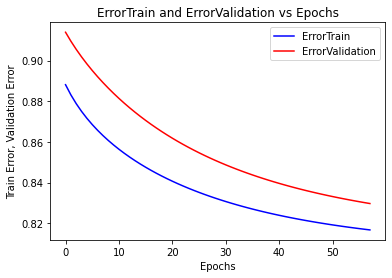

In [27]:
plt.plot(range(len(Batch_Model.ErrorTrain)), Batch_Model.ErrorTrain, c= 'blue', label = 'ErrorTrain')
plt.plot(range(len(Batch_Model.ErrorValidation)), Batch_Model.ErrorValidation, c= 'red', label = 'ErrorValidation')
plt.xlabel('Epochs')
plt.ylabel('Train Error, Validation Error')
plt.title("ErrorTrain and ErrorValidation vs Epochs")
plt.legend()
plt.show

              precision    recall  f1-score   support

         0.0       0.62      0.62      0.62        98
         1.0       0.78      0.77      0.78       168

    accuracy                           0.72       266
   macro avg       0.70      0.70      0.70       266
weighted avg       0.72      0.72      0.72       266

Accuracy :  0.7180451127819549


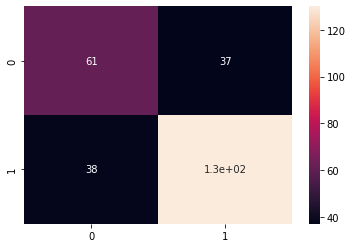

In [28]:
print(classification_report(test_Y, validation_prediction_Batch))
conf_Matrix_BGD = confusion_matrix(test_Y, validation_prediction_Batch)
sns.heatmap(conf_Matrix_BGD, annot=True)
print("Accuracy : ", (conf_Matrix_BGD[0,0] + conf_Matrix_BGD[1,1])/(np.sum(conf_Matrix_BGD)))

#Stochastic Gradient Descent

In [29]:
SGD_Model = Logistic_Regressor(No_ofFeatures, 0.1)
SGD_Model.Stochastic_GD(train_X, train_Y, test_X, test_Y)

Epoch 1:

1062/1062 :   Traning Error : 0.94325887   ||   Validation Error : 0.83971548    Validation Accuracy : 0.7218  

Epoch 2:

1062/1062 :   Traning Error : 0.93488007   ||   Validation Error : 0.84387024    Validation Accuracy : 0.7218  

Epoch 3:

1062/1062 :   Traning Error : 0.93402416   ||   Validation Error : 0.84687765    Validation Accuracy : 0.7293  

Epoch 4:

1062/1062 :   Traning Error : 0.93381446   ||   Validation Error : 0.84862596    Validation Accuracy : 0.7331  

Epoch 5:

1062/1062 :   Traning Error : 0.93366484   ||   Validation Error : 0.84965106    Validation Accuracy : 0.7331  

****************BEST WEIGHTS ON WHICH HIGHEST ACCURACY ACHIEVED - RESTORIED******************


In [30]:
validation_prediction = SGD_Model.Pridction(test_X, getLabel=True)
print(f"Accuracy on Testing Data : {SGD_Model.Generic_AccuracyScore(test_Y, validation_prediction)}")

Accuracy on Testing Data : 0.7331


<function matplotlib.pyplot.show>

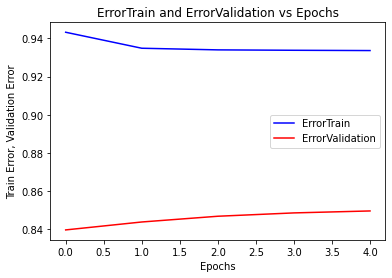

In [31]:
plt.plot(range(len(SGD_Model.ErrorTrain)), SGD_Model.ErrorTrain, c= 'blue', label = 'ErrorTrain')
plt.plot(range(len(SGD_Model.ErrorValidation)), SGD_Model.ErrorValidation, c= 'red', label = 'ErrorValidation')
plt.xlabel('Epochs')
plt.ylabel('Train Error, Validation Error')
plt.title("ErrorTrain and ErrorValidation vs Epochs")
plt.legend()
plt.show

              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64        98
         1.0       0.79      0.79      0.79       168

    accuracy                           0.73       266
   macro avg       0.71      0.71      0.71       266
weighted avg       0.73      0.73      0.73       266

Accuracy :  0.7330827067669173


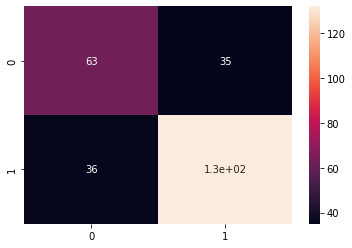

In [32]:
print(classification_report(test_Y, validation_prediction))
conf_Matrix_SGD = confusion_matrix(test_Y, validation_prediction)
sns.heatmap(conf_Matrix_SGD, annot=True)
print("Accuracy : ", (conf_Matrix_SGD[0,0] + conf_Matrix_SGD[1,1])/(np.sum(conf_Matrix_SGD)))

#Mini-Batch Gradient Descent 

In [33]:
MiniBatch_Model = Logistic_Regressor(No_ofFeatures, 0.1)
MiniBatch_Model.MiniBatch_GD(train_X, train_Y, test_X, test_Y, 32)

Epoch 1:

Traning Error : 0.86674851   ||   Validation Error : 0.85591078    Validation Accuracy : 0.7068  

Epoch 2:

Traning Error : 0.83096589   ||   Validation Error : 0.83160821    Validation Accuracy : 0.7105  

Epoch 3:

Traning Error : 0.82030455   ||   Validation Error : 0.82266812    Validation Accuracy : 0.7068  

Epoch 4:

Traning Error : 0.81623424   ||   Validation Error : 0.81870494    Validation Accuracy : 0.703  

Epoch 5:

Traning Error : 0.81432   ||   Validation Error : 0.81662277    Validation Accuracy : 0.7105  

Epoch 6:

Traning Error : 0.81321019   ||   Validation Error : 0.81533906    Validation Accuracy : 0.7143  

Epoch 7:

Traning Error : 0.81244214   ||   Validation Error : 0.81442879    Validation Accuracy : 0.7143  

Epoch 8:

Traning Error : 0.81184087   ||   Validation Error : 0.8137104    Validation Accuracy : 0.7143  

Epoch 9:

Traning Error : 0.81133374   ||   Validation Error : 0.81310129    Validation Accuracy : 0.7143  

Epoch 10:

Traning Error

In [34]:
validation_prediction_MBatch = MiniBatch_Model.Pridction(test_X, getLabel=True)
print(f"Accuracy on Testing Data : {MiniBatch_Model.Generic_AccuracyScore(test_Y, validation_prediction_MBatch)}")

Accuracy on Testing Data : 0.7218


<function matplotlib.pyplot.show>

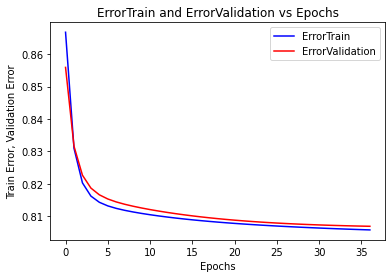

In [35]:
plt.plot(range(len(MiniBatch_Model.ErrorTrain)), MiniBatch_Model.ErrorTrain, c= 'blue', label = 'ErrorTrain')
plt.plot(range(len(MiniBatch_Model.ErrorValidation)), MiniBatch_Model.ErrorValidation, c= 'red', label = 'ErrorValidation')
plt.xlabel('Epochs')
plt.ylabel('Train Error, Validation Error')
plt.title("ErrorTrain and ErrorValidation vs Epochs")
plt.legend()
plt.show

              precision    recall  f1-score   support

         0.0       0.65      0.54      0.59        98
         1.0       0.76      0.83      0.79       168

    accuracy                           0.72       266
   macro avg       0.70      0.68      0.69       266
weighted avg       0.72      0.72      0.72       266

Accuracy :  0.7218045112781954


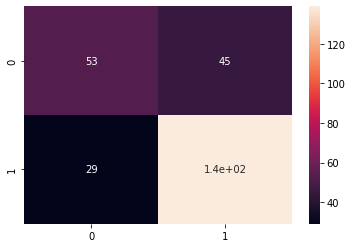

In [36]:
print(classification_report(test_Y, validation_prediction_MBatch))
conf_Matrix_MBGD = confusion_matrix(test_Y, validation_prediction_MBatch)
sns.heatmap(conf_Matrix_MBGD, annot=True)
print("Accuracy : ", (conf_Matrix_MBGD[0,0] + conf_Matrix_MBGD[1,1])/(np.sum(conf_Matrix_MBGD)))

#Review on All Three Methods

In Batch we had to do alot of epochs and at the end accuracy isn't the best when compared to other models.<br>

In Stochastic instead of finding derivate on all instance at once we calculate derivate on one instance and update our weights based on that. This approach saved us from doing so many epochs and got us the result in less then 10 epochs.<br>

The best approach out of all is the Mini-Batch, in this we combined the approach of both batch and stochastic, which resulted in us having to do less epochs as well as improved accuracy from all other approaches.